<a href="https://colab.research.google.com/github/DGKobelev/Home/blob/main/intern_2/chance_%22all_datset_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В ходе проекта была выполнена серия шагов по предобработке данных, созданию модели и её тестированию. Вот краткий обзор всех этапов работы:

### 1. **Создание и загрузка файлов**
   - Был создан скрипт для загрузки файлов в Google Colab и сохранения их в определённую директорию. Все загруженные файлы были перемещены в папку `/content/drive/MyDrive/Стажировка/Dataset`.
   - **Результат:** Успешно загружены и сохранены несколько файлов с датасетами.

### 2. **Объединение данных из нескольких файлов**
   - Чтение всех Excel-файлов из папки с использованием Pandas и последующее объединение в один DataFrame. При этом обрабатывались столбцы, где отсутствовали данные, добавлялись недостающие столбцы, а данные выравнивались.
   - **Результат:** Создан единый DataFrame, содержащий все данные из различных файлов.

### 3. **Очистка данных**
   - Была произведена очистка данных, в том числе удаление ненужных столбцов и исправление значений в столбце 'Portal User Group'. Удалены строки с пропусками в столбцах 'Description' и 'Portal User Group'.
   - **Результат:** Очищенные данные сохранены в отдельный файл.

### 4. **Замена сокращений и кодов аэропортов**
   - Было разработано несколько функций для замены сокращений на полные формы и для замены кодов аэропортов на соответствующие имена аэропортов. Эти изменения применены к столбцу 'Description'.
   - **Результат:** Файл с обновленными текстовыми данными сохранён в формате CSV.

### 5. **Нормализация текста и токенизация**
   - Тексты были очищены от специальных символов, нормализованы с использованием библиотеки Pymorphy2 для приведения всех слов к начальной форме, и затем токенизированы. Также были удалены стоп-слова, не влияющие на смысл текста.
   - **Результат:** Нормализованные и токенизированные данные сохранены в файл.

### 6. **Извлечение биграмм**
   - Был использован алгоритм для извлечения биграмм из текстов, представленных в столбце 'Description'. Эти биграммы затем добавлены в DataFrame для дальнейшего анализа.
   - **Результат:** Файл с биграммами сохранён для последующего использования.

### 7. **Поиск дубликатов и очистка данных**
   - Создан скрипт для поиска дубликатов биграмм, принадлежащих разным классам. После этого дубликаты были удалены, а очищенные данные сохранены.
   - **Результат:** Дубликаты удалены, и данные очищены для дальнейшего анализа.

### 8. **Построение матрицы переходов на основе цепей Маркова**
   - Построена матрица переходов для каждого класса на основе биграмм, где для каждой биграммы вычислялась вероятность перехода на следующую биграмму. Эти данные нормализованы и сохранены в файл.
   - **Результат:** Сохранена матрица переходов для использования в модели на основе цепей Маркова.

### 9. **Тестирование модели на основе цепей Маркова**
   - Используя ранее построенную матрицу переходов, был реализован алгоритм классификации на основе цепей Маркова. Данные были разделены на обучающую и тестовую выборки, после чего был выполнен процесс предсказания классов для тестовой выборки.
   - **Результат:** Модель продемонстрировала точность 0.8904, что является довольно высоким результатом для задачи с 119 уникальными классами.

### **Обзор результатов: с 119 уникальными классами**
- Модель на основе цепей Маркова показала точность 0.8904, что является хорошим результатом для такой многоклассовой задачи.
- Однако некоторые классы имели очень низкие показатели precision и recall, что говорит о недостаточном количестве данных для этих классов или о сложностях в их классификации.
- Важно отметить, что классы с малым количеством данных или уникальными особенностями требуют дальнейшей проработки, возможно, через объединение классов или применение других методов обработки данных.

Итоговый результат — хорошо работающая модель для большинства классов, с возможностями для дальнейшего улучшения через более сложные методы классификации и работу с редкими классами.

### Обзор замены классов и тестирования модели на 95 классах

#### 1. **Замена классов**
В рамках улучшения качества классификации и уменьшения количества классов был проведен процесс объединения и упрощения некоторых классов. Для этого использовался словарь замен классов, в котором малочисленные классы либо объединялись с похожими по смыслу, либо преобразовывались в более общие категории. Примером такого объединения может служить:
- Классы вроде "PRODUCT VIETNAM", "PRODUCT SPAIN", "PRODUCT CLAIM" были объединены в более общий класс "PRODUCT".
- Классы с менее значимыми различиями, такие как "DIRECT SALES" и "ONLINE SALES", также были объединены, чтобы уменьшить количество классов.

#### 2. **Тестирование модели на 119 классах**
Результаты тестирования на 119 классах показали точность модели в **0.8904**. Однако в этом тесте было много классов с очень малым количеством данных, что приводило к низким показателям precision и recall для некоторых из них. Например:
- Классы вроде `BOOKING B2C`, `DEP3 CLAIM`, и `DEP3 Seychelles` имели крайне низкие значения precision и recall из-за малочисленных примеров.
- Это создало ситуацию, когда модель могла классифицировать эти классы почти наугад, что ухудшало общие результаты.

#### 3. **Тестирование модели на 95 классах**
После выполнения замены и объединения классов, модель была повторно протестирована на 95 классах. Новый результат показал **улучшенную точность** в **0.8918**, что стало небольшим, но значимым улучшением. Вот несколько ключевых наблюдений:
- **Объединение редких классов**: После удаления и объединения классов, таких как "PRODUCT", "DEP3", и "INFO", показатели для этих классов значительно улучшились. Например, класс "PRODUCT" после объединения с другими схожими классами показал улучшенные результаты, увеличив значение f1-score до **0.91**.
- **Более сбалансированные классы**: Теперь меньше классов с очень малым количеством данных, таких как "BOOKING B2C" и "DEP3 CLAIM". Благодаря этому удалось улучшить макро показатели precision и recall, которые выросли до **0.80 и 0.95** соответственно, что стало большим шагом вперёд по сравнению с тестированием на 119 классах.
  
#### 4. **Анализ результатов**
- **Точность**: Точность увеличилась с **0.8904** на 119 классах до **0.8918** на 95 классах. Хотя это увеличение может показаться небольшим, оно демонстрирует, что упрощение классов привело к более точным результатам.
- **F1-score**: С объединением классов и уменьшением количества редких классов удалось улучшить показатели для классов, которые ранее имели низкие результаты. Общие показатели f1-score улучшились, особенно для классов, таких как "PRODUCT" и "ACCOUNTING NOTE", что в итоге подняло средневзвешенное значение f1-score для всей модели.

#### 5. **Заключение**
- **Объединение малочисленных классов** и **упрощение категорий** помогли улучшить общие показатели модели, минимизировав влияние малочисленных классов на результаты.
- Несмотря на небольшое улучшение в точности, было замечено значительное улучшение в более сбалансированных классах, что помогает модели предсказывать результаты с большей уверенностью и точностью.
- Однако стоит отметить, что некоторая потеря информации из-за объединения классов может в будущем потребовать более тонкой настройки и работы с данными, чтобы не терять важные признаки классов при дальнейших улучшениях модели.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Загрузка датасета**

In [ ]:
import os
from google.colab import files

# Создание директории для сохранения датасета, если она не существует
save_path = "/content/drive/MyDrive/Стажировка/Dataset"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Загрузка файлов в среду выполнения Colab
uploaded = files.upload()

# Проверка успешности загрузки
if len(uploaded) > 0:
    # Сохранение загруженных файлов в созданную директорию
    for filename, data in uploaded.items():
        file_path = os.path.join(save_path, filename)
        with open(file_path, "wb") as f:
            f.write(data)
        print("Файл успешно сохранен в", file_path)

    # Удаление файлов из текущей директории (/content), если они были загружены
    for filename in os.listdir('/content'):
        if filename in uploaded.keys():
            os.remove(os.path.join('/content', filename))

else:
    print("Не удалось загрузить файлы.")

Saving AI_dataset_2022-3Q.xlsx to AI_dataset_2022-3Q.xlsx
Saving AI_dataset_2022-4Q.xlsx to AI_dataset_2022-4Q.xlsx
Saving AI_dataset_2023-1Q.xlsx to AI_dataset_2023-1Q.xlsx
Saving AI_dataset_2023-2Q.xlsx to AI_dataset_2023-2Q.xlsx
Saving AI_dataset_2023-3Q.xlsx to AI_dataset_2023-3Q.xlsx
Saving AI_dataset_2023-4Q.xlsx to AI_dataset_2023-4Q.xlsx
Saving AI_dataset_2024-1Q.xlsx to AI_dataset_2024-1Q.xlsx
Saving AI_dataset_2024-2Q(28.05.2024).xlsx to AI_dataset_2024-2Q(28.05.2024).xlsx
Saving AI_dataset_2024-2Q(29.05.2024).xlsx to AI_dataset_2024-2Q(29.05.2024).xlsx
Saving AI_dataset_2024-2Q(30.05.2024-03.06.2024).xlsx to AI_dataset_2024-2Q(30.05.2024-03.06.2024).xlsx
Файл успешно сохранен в /content/drive/MyDrive/Стажировка/Dataset/AI_dataset_2022-3Q.xlsx
Файл успешно сохранен в /content/drive/MyDrive/Стажировка/Dataset/AI_dataset_2022-4Q.xlsx
Файл успешно сохранен в /content/drive/MyDrive/Стажировка/Dataset/AI_dataset_2023-1Q.xlsx
Файл успешно сохранен в /content/drive/MyDrive/Стажировк

**Объединение всех файлов в один.**

In [ ]:
!pip install openpyxl


In [ ]:
import pandas as pd
import os

# Указать путь к папке с файлами
folder_path = '/content/drive/MyDrive/Стажировка/Dataset'

# Создать список для хранения DataFrame
dataframes = []
columns_set = set()

# Пройтись по всем файлам в папке и прочитать их
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path)
        dataframes.append(df)
        columns_set.update(df.columns)

# Преобразовать set в список для сохранения порядка столбцов
all_columns = list(columns_set)

# Заполнить недостающие столбцы NaN значениями
for i, df in enumerate(dataframes):
    missing_cols = set(all_columns) - set(df.columns)
    for col in missing_cols:
        df[col] = pd.NA
    # Переупорядочить столбцы в соответствии с all_columns
    dataframes[i] = df[all_columns]

# Объединить все DataFrame в один
combined_df = pd.concat(dataframes, ignore_index=True)

# Сохранить объединённый DataFrame в новый файл с использованием openpyxl
combined_df.to_excel('/content/drive/MyDrive/Стажировка/Dataset/combined_file.xlsx', index=False, engine='openpyxl')


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


**Удаление не нужных столбцов, слов и строк с пустыми текстами.**

In [ ]:
import pandas as pd

# Загрузка файла CSV
combined_df = pd.read_csv('/content/drive/MyDrive/Стажировка/Dataset/combined_file.csv')

# Удаление указанных столбцов
columns_to_drop = [
    '(Do Not Modify) Case',
    '(Do Not Modify) Row Checksum',
    '(Do Not Modify) Modified On',
    'Created On',
    'Reservation Date (Reservation) (Voucher)',
    'Reservation Begin Date (Reservation) (Voucher)',
    'Reservation End Date (Reservation) (Voucher)'
]
combined_df = combined_df.drop(columns=columns_to_drop)

# Удаление слов "(Coral)" и "(Sunmar)" из столбца Portal User Group
combined_df['Portal User Group'] = combined_df['Portal User Group'].str.replace(r'\(Coral\)', '', regex=True)
combined_df['Portal User Group'] = combined_df['Portal User Group'].str.replace(r'\(Sunmar\)', '', regex=True)

# Удаление строк с пустыми значениями в столбцах Description и Portal User Group
combined_df = combined_df.dropna(subset=['Description', 'Portal User Group'])

# Сохранение объединенного DataFrame в формате CSV
combined_df.to_csv('/content/drive/MyDrive/Стажировка/Dataset/combined_part_file.csv', index=False)


**Замены сокращений и кодов аэропортов.**

In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 11.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import ast
import docx

# Создание словаря сокращений
abbreviations = {
    # Список сокращений...
}

# Преобразование ключей словаря к нижнему регистру для учёта обоих регистров
abbreviations = {k.lower(): v for k, v in abbreviations.items()}

# Функция для замены сокращений на полные формы с учётом чисел от 1 до 9 перед или после сокращений
def replace_abbreviations(text, abbreviations):
    if isinstance(text, list):
        cleaned_text = []
        for sublist in text:
            cleaned_sublist = []
            for word in sublist:
                match = re.match(r'(\d{1,2})?(.*?)(\d{1,2})?$', word.lower())
                if match:
                    prefix, abbrev, suffix = match.groups()
                    word_replaced = abbreviations.get(abbrev, word)
                    if prefix:
                        word_replaced = prefix + ' ' + word_replaced
                    if suffix:
                        word_replaced = word_replaced + ' ' + suffix
                    cleaned_sublist.append(word_replaced)
                else:
                    cleaned_sublist.append(word)
            cleaned_text.append(cleaned_sublist)
        return cleaned_text
    return text

# Функция для безопасной оценки строк
def safe_eval(text):
    try:
        if text.startswith('[') and text.endswith(']'):
            return ast.literal_eval(text)
    except Exception as e:
        print(f"Ошибка при преобразовании текста: {e}")
        return text
    return text

# Функция для чтения таблицы из документа Word
def read_airport_codes(doc_path):
    doc = docx.Document(doc_path)
    airport_dict = {}
    for table in doc.tables:
        for row in table.rows:
            city = row.cells[0].text.strip()
            code = row.cells[1].text.strip()
            airport_dict[code.lower()] = f"аэропорт {city}"
    return airport_dict

# Путь к файлу с кодами аэропортов
doc_path = '/content/drive/MyDrive/Last/Список аэропорт.docx'

# Загрузка словаря с кодами аэропортов
airport_codes = read_airport_codes(doc_path)

# Загрузка данных из combined_part_file.csv
df = pd.read_csv('/content/drive/MyDrive/Стажировка/Dataset/combined_part_file.csv')

# Преобразование строковых представлений списков обратно в списки
df['Description'] = df['Description'].apply(lambda x: safe_eval(x) if isinstance(x, str) else x)

# Применение функции замены сокращений к столбцу 'Description'
df['Description'] = df['Description'].apply(lambda x: replace_abbreviations(x, abbreviations))

# Применение функции замены кодов аэропортов
df['Description'] = df['Description'].apply(lambda x: replace_abbreviations(x, airport_codes))

# Сохранение данных после замены
output_csv_path = '/content/drive/MyDrive/Last_1/final_dataset.csv'
df.to_csv(output_csv_path, index=False)
print("Сокращения и коды аэропортов успешно заменены и данные сохранены в формате CSV.")


Сокращения и коды аэропортов успешно заменены и данные сохранены в формате CSV.


**Перевод текстов в столбце Description к нижнему регистру и удаление лишних пробелов и символов.**

In [ ]:
!pip install pymorphy2


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 64.3 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=acc9a680b2a72367703da5daadec28a9fa0a2d9187835318de5c6f43b1ab943b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pandas as pd
import pymorphy2
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

# Инициализация анализатора pymorphy2
ma = pymorphy2.MorphAnalyzer()

# Загрузка стоп-слов из NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Добавление дополнительных стоп-слов
additional_stop_words = {'коллеги', 'коллега', 'добрый', 'день', 'вечер', 'пожалуйста', 'уважаемый', 'здравствуйте'}
stop_words.update(additional_stop_words)

# Функция для очистки и нормализации текста
def clean_text(text):
    # Удаление ненужных символов
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace("\\", " ").replace(u"╚", " ").replace(u"╩", " ")
    text = text.lower()
    text = re.sub('-\s*\r\n|\r\n', '', text)  # удаление переносов строк
    text = " ".join(ma.parse(word)[0].normal_form for word in text.split())
    text = re.sub('\s+', ' ', text)  # замена нескольких пробелов одним
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Загрузка данных
file_path = '/content/drive/MyDrive/Last_1/final_dataset.csv'
combined_df = pd.read_csv(file_path)

# Применение функции очистки и нормализации к столбцу 'Description' с индикацией выполнения
tqdm.pandas()
combined_df['Description_reduct'] = combined_df['Description'].progress_apply(clean_text)

# Сохранение очищенного DataFrame в формате CSV
output_csv_path = '/content/drive/MyDrive/Last_1/final_dataset_cleaned.csv'
combined_df.to_csv(output_csv_path, index=False)

print("DataFrame успешно сохранен в формате CSV.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 918781/918781 [1:42:51<00:00, 148.86it/s]


DataFrame успешно сохранен в формате CSV.


**Разбивка текста на отдельные слова.**

---
Разделение текста на слова позволяет позже легко извлекать биграммы.


In [ ]:
import pandas as pd

# Загрузка данных
file_path = '/content/drive/MyDrive/Last_1/final_dataset_cleaned.csv'
df = pd.read_csv(file_path)

# Функция для разбиения текста на слова и исключения чисел
def split_text(text):
    if pd.isna(text) or not isinstance(text, str) or text.strip() == '':  # Проверка на пустые и пропущенные строки
        return []  # Возвращаем пустой список, если текст отсутствует или пустой
    words = text.split()
    words = [word for word in words if not word.isdigit()]  # Исключаем числа
    return words

# Применение функции к столбцу 'Description_reduct'
df['Description_reduct_words'] = df['Description_reduct'].apply(split_text)

# Сохранение обновленного DataFrame в формате CSV
output_csv_path = '/content/drive/MyDrive/Last_1/final_dataset_words.csv'
df.to_csv(output_csv_path, index=False)

print("DataFrame успешно сохранен в формате CSV.")


DataFrame успешно сохранен в формате CSV.


Получим файл со списком всех уникальных слов, отсортированных по частоте

In [ ]:
import pandas as pd
from collections import Counter
import os

# Загрузка данных из CSV файла
file_path = '/content/drive/MyDrive/Last_1/final_dataset_words.csv'
df = pd.read_csv(file_path)

# Проверка наличия столбца 'Description_reduct'
if 'Description_reduct' not in df.columns:
    raise ValueError("В файле отсутствует столбец 'Description_reduct'.")

# Объединение всех текстов в столбце 'Description_reduct' в один список слов
all_words = ' '.join(df['Description_reduct'].fillna('')).split()

# Подсчет частоты каждого уникального слова
word_counts = Counter(all_words)

# Преобразование результата в DataFrame и сортировка по убыванию частоты
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Путь для сохранения результата
output_folder = '/content/drive/MyDrive/Chance'
output_file = os.path.join(output_folder, 'word_frequency_list.csv')

# Создание директории, если она не существует
os.makedirs(output_folder, exist_ok=True)

# Сохранение результата в файл CSV
word_freq_df.to_csv(output_file, index=False)

print(f"Список уникальных слов с их частотой использования сохранен в: {output_file}")


Список уникальных слов с их частотой использования сохранен в: /content/drive/MyDrive/Chance/word_frequency_list.csv


**Создание функции и извлечение биграмм.**

---
 В столбце 'Bigrams' для каждого текста биграммы сохраняются в том порядке, в котором слова следуют друг за другом в тексте. Это означает, что порядок биграмм соответствует порядку слов в исходном тексте, сохраняя смысловую структуру.


In [ ]:
import pandas as pd
from nltk import ngrams

# Функция для извлечения биграмм
def extract_bigrams(words_list):
    if len(words_list) >= 2:  # Проверяем, что список содержит хотя бы 2 слова
        return list(ngrams(words_list, 2))
    return []  # Возвращаем пустой список, если недостаточно слов для создания биграмм

# Загрузка данных
file_path = '/content/drive/MyDrive/Last_1/final_dataset_words.csv'
df = pd.read_csv(file_path)

# Преобразуем столбец 'Description_reduct_words' в список слов (eval)
df['Description_reduct_words'] = df['Description_reduct_words'].apply(eval)

# Применение функций для извлечения биграмм
df['Bigrams'] = df['Description_reduct_words'].apply(extract_bigrams)

# Сохранение обновленного DataFrame в формате CSV
output_csv_path = '/content/drive/MyDrive/Last_1/final_dataset_ngrams.csv'
df.to_csv(output_csv_path, index=False)

print("DataFrame успешно сохранен в формате CSV.")


DataFrame успешно сохранен в формате CSV.


**Подсчет количества уникальных биграмм в столбце 'Bigrams'.**

In [ ]:
import pandas as pd
from tqdm import tqdm

# Загрузка данных из файла
file_path = '/content/drive/MyDrive/Last_1/final_dataset_ngrams.csv'
df = pd.read_csv(file_path)

# Преобразование строки в список кортежей
df['Bigrams'] = df['Bigrams'].apply(eval)

# Инициализация множества для хранения уникальных биграмм
unique_bigrams = set()

# Извлечение уникальных биграмм с индикацией хода выполнения
for bigrams in tqdm(df['Bigrams'], desc="Подсчет уникальных биграмм"):
    unique_bigrams.update(bigrams)

# Подсчет количества уникальных биграмм
num_unique_bigrams = len(unique_bigrams)

print(f"Количество уникальных биграмм: {num_unique_bigrams}")


Подсчет уникальных биграмм: 100%|██████████| 918781/918781 [00:12<00:00, 72723.76it/s]

Количество уникальных биграмм: 1976607


**Находим и удаляем строки, где тексты идентичны по биграммам, но классы разные.**

In [ ]:
import pandas as pd
from tqdm import tqdm

# Загрузка данных
file_path = '/content/drive/MyDrive/Last_1/final_dataset_ngrams.csv'
df = pd.read_csv(file_path)

# Преобразование строковых списков в списки кортежей
df['Bigrams'] = df['Bigrams'].apply(eval)

# Создание словаря для хранения уникальных биграмм с их индексами
bigrams_dict = {}

# Проход по каждому тексту и добавление в словарь
for index, row in tqdm(df.iterrows(), total=len(df), desc="Поиск дубликатов"):
    bigrams = tuple(row['Bigrams'])  # Преобразуем список биграмм в кортеж для хэширования
    if bigrams in bigrams_dict:
        bigrams_dict[bigrams].append((row['Portal User Group'], index))  # Добавляем класс и индекс
    else:
        bigrams_dict[bigrams] = [(row['Portal User Group'], index)]

# Поиск строк с одинаковыми биграммами, но разными классами
duplicate_rows = []

for bigrams, occurrences in bigrams_dict.items():
    classes = {occurrence[0] for occurrence in occurrences}  # Собираем уникальные классы
    if len(classes) > 1:  # Если классы разные
        for occurrence in occurrences:
            duplicate_rows.append((occurrence[1], occurrence[0]))  # Добавляем индекс и класс

# Создание DataFrame с ошибочными строками
duplicate_df = df.loc[[row[0] for row in duplicate_rows]].copy()
duplicate_df['Class'] = [row[1] for row in duplicate_rows]

# Сохранение дубликатов в файл
output_duplicates_csv_path = '/content/drive/MyDrive/Last_1/duplicate_bigrams.csv'
duplicate_df.to_csv(output_duplicates_csv_path, index=False)

# Удаление строк с ошибками из оригинального DataFrame
df_cleaned = df.drop(index=[row[0] for row in duplicate_rows])

# Сохранение очищенных данных
output_cleaned_csv_path = '/content/drive/MyDrive/Last_1/cleaned_dataset_ngrams.csv'
df_cleaned.to_csv(output_cleaned_csv_path, index=False)

print(f"Ошибочные строки сохранены в файл: {output_duplicates_csv_path}")
print(f"Очищенные данные сохранены в файл: {output_cleaned_csv_path}")


Поиск дубликатов: 100%|██████████| 918781/918781 [01:09<00:00, 13250.02it/s]


Ошибочные строки сохранены в файл: /content/drive/MyDrive/Last_1/duplicate_bigrams.csv
Очищенные данные сохранены в файл: /content/drive/MyDrive/Last_1/cleaned_dataset_ngrams.csv


In [ ]:
import pandas as pd

# Загрузка данных из CSV-файла
file_path = '/content/drive/MyDrive/Last_1/duplicate_bigrams.csv'
df = pd.read_csv(file_path)

# Сохранение данных в формате XLSX
output_file_path = '/content/drive/MyDrive/Last_1/duplicate_bigrams.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Файл успешно преобразован и сохранен в формате XLSX: {output_file_path}")


Файл успешно преобразован и сохранен в формате XLSX: /content/drive/MyDrive/Last_1/duplicate_bigrams.xlsx


In [ ]:
import pandas as pd

# Загрузка данных из CSV-файла
file_path = '/content/drive/MyDrive/Last_1/cleaned_dataset_ngrams.csv'
df = pd.read_csv(file_path)

# Сохранение данных в формате XLSX
output_file_path = '/content/drive/MyDrive/Last_1/cleaned_dataset_ngrams.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Файл успешно преобразован и сохранен в формате XLSX: {output_file_path}")


Файл успешно преобразован и сохранен в формате XLSX: /content/drive/MyDrive/Last_1/cleaned_dataset_ngrams.xlsx


In [ ]:
import pandas as pd

# Путь к файлу
file_path = '/content/drive/MyDrive/Last_1/cleaned_dataset_ngrams.csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Подсчет количества классов
classes_before = df['Portal User Group'].nunique()
print(f"Количество классов: {classes_before}")

Количество классов: 121


**Удалим пустые  строки по столбцу 'Description'.**


In [ ]:
import pandas as pd

# Путь к файлу
file_path = "/content/drive/MyDrive/Last_1/cleaned_dataset_ngrams.csv"

# Загрузка данных из файла
df = pd.read_csv(file_path)

# Удаление строк, у которых столбец 'Description' пустой
df_cleaned = df[df['Description'].notna()]

# Подсчет количества данных в каждом классе
class_counts = df_cleaned['Portal User Group'].value_counts()

# Удаление строк, где классы имеют нулевое количество данных
classes_with_data = class_counts[class_counts > 0].index  # Классы с данными
df_cleaned = df_cleaned[df_cleaned['Portal User Group'].isin(classes_with_data)]

# Подсчет количества уникальных классов после очистки
unique_classes_after = df_cleaned['Portal User Group'].nunique()
print(f"Количество уникальных классов после очистки: {unique_classes_after}")

# Сохранение очищенного DataFrame в новый файл
output_file_path = "/content/drive/MyDrive/Last_1/full_dataset_ngrams_cleaned.csv"
df_cleaned.to_csv(output_file_path, index=False)

print(f"Строки с пустыми значениями и нулевыми данными в классах удалены. Результат сохранен в: {output_file_path}")


Количество уникальных классов после очистки: 121
Строки с пустыми значениями и нулевыми данными в классах удалены. Результат сохранен в: /content/drive/MyDrive/Last_1/full_dataset_ngrams_cleaned.csv


Общее количество уникальных классов: 121
Общее количество данных: 814250



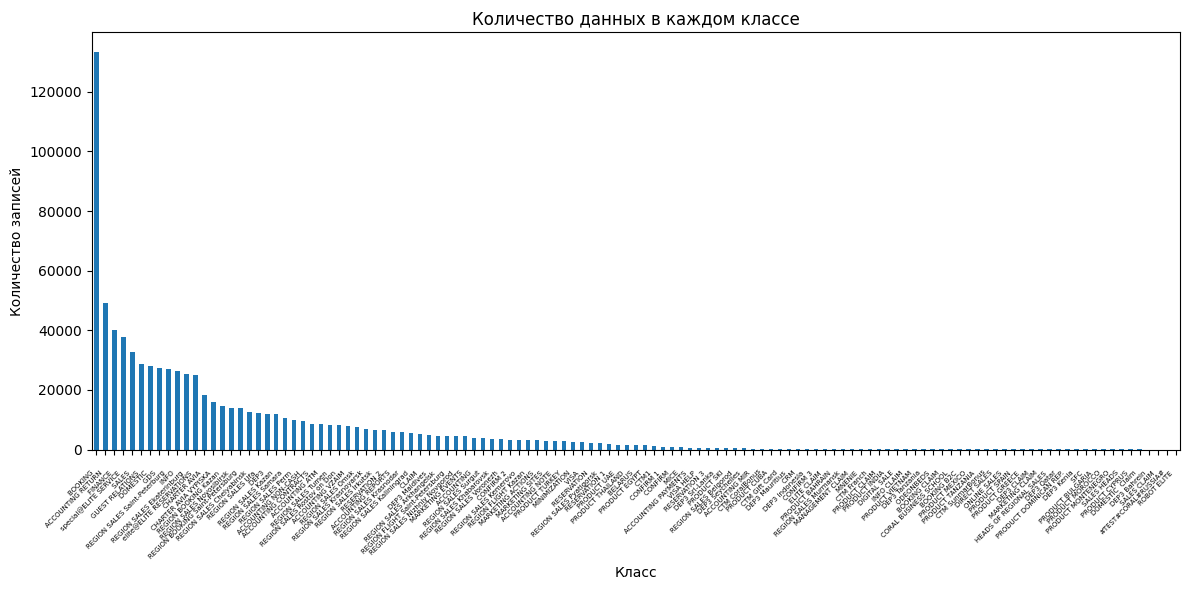

Данные классов без записей удалены. Результат сохранен в: /content/drive/MyDrive/Last_1/full_dataset_ngrams_filtered.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Путь к очищенному файлу
file_path = "/content/drive/MyDrive/Last_1/full_dataset_ngrams_cleaned.csv"

# Загрузка данных из файла
df = pd.read_csv(file_path)

# Подсчет количества данных в каждом классе
class_counts = df['Portal User Group'].value_counts()

# Фильтрация классов, у которых есть данные (больше 0 записей)
classes_with_data = class_counts[class_counts > 0].index  # Оставляем только те классы, которые имеют данные
df_filtered = df[df['Portal User Group'].isin(classes_with_data)]  # Оставляем только строки с этими классами

# Подсчет общего количества уникальных классов и записей после фильтрации
unique_classes = df_filtered['Portal User Group'].nunique()  # Количество уникальных классов
total_data = len(df_filtered)  # Общее количество записей

print(f"Общее количество уникальных классов: {unique_classes}")
print(f"Общее количество данных: {total_data}\n")

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
df_filtered['Portal User Group'].value_counts().plot(kind='bar')
plt.title('Количество данных в каждом классе')
plt.xlabel('Класс')
plt.ylabel('Количество записей')

# Настройка меток оси x
plt.xticks(rotation=45, ha='right', fontsize=5)
plt.gca().xaxis.set_tick_params(pad=10)

plt.tight_layout()

# Отображение диаграммы
plt.show()

# Сохранение очищенного DataFrame в новый файл
output_file_path = "/content/drive/MyDrive/Last_1/full_dataset_ngrams_filtered.csv"
df_filtered.to_csv(output_file_path, index=False)

print(f"Данные классов без записей удалены. Результат сохранен в: {output_file_path}")


Проверим каждую строку в столбце 'Bigrams' на наличие синтаксических ошибок при попытке преобразовать строку в список.

In [ ]:
import pandas as pd
from ast import literal_eval
from tqdm import tqdm  # Для индикации

# Загрузка данных
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_filtered.csv'
df = pd.read_csv(file_path)

# Функция для проверки корректности строки в столбце 'Bigrams'
def check_bigrams_syntax():
    errors = []
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Проверка биграмм"):
        try:
            if pd.isna(row['Bigrams']):  # Пропускаем пустые строки
                continue
            literal_eval(row['Bigrams'])  # Попытка интерпретации строки как списка
        except (ValueError, SyntaxError) as e:
            errors.append((index, row['Bigrams'], str(e)))

    return errors

# Проверка столбца 'Bigrams'
bigrams_errors = check_bigrams_syntax()
if bigrams_errors:
    print("Ошибки в столбце 'Bigrams':")
    for error in bigrams_errors:
        print(f"Строка {error[0]}: {error[1]} - Ошибка: {error[2]}")
else:
    print("Ошибок в столбце 'Bigrams' не найдено.")


Проверка биграмм: 100%|██████████| 814250/814250 [02:58<00:00, 4561.87it/s]


Ошибок в столбце 'Bigrams' не найдено.


**Подсчитаем вероятности переходов между биграммами для каждого класса.**

In [ ]:
import pandas as pd
from collections import defaultdict
import csv
from tqdm import tqdm

# Загрузка данных
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_filtered.csv'
df = pd.read_csv(file_path)

# Преобразование строки в список кортежей
df['Bigrams'] = df['Bigrams'].apply(eval)

# Создание словаря для матрицы переходов для каждого класса
transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

# Подсчет переходов между биграммами для каждого класса с индикацией выполнения
for class_name, group in tqdm(df.groupby('Portal User Group'), desc="Создание матрицы переходов"):
    for bigrams in group['Bigrams']:
        for i in range(len(bigrams) - 1):
            current_bigram = bigrams[i]
            next_bigram = bigrams[i + 1]
            transition_matrix[class_name][current_bigram][next_bigram] += 1

# Преобразование счетчиков в вероятности (нормализация)
for class_name in tqdm(transition_matrix, desc="Нормализация данных"):
    for current_bigram in transition_matrix[class_name]:
        total = sum(transition_matrix[class_name][current_bigram].values())
        for next_bigram in transition_matrix[class_name][current_bigram]:
            transition_matrix[class_name][current_bigram][next_bigram] /= total

# Сохранение матрицы переходов в CSV файл
output_file_path = '/content/drive/MyDrive/Last_1/transition_matrix.csv'

# Запись в CSV файл
with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Class', 'Current Bigram', 'Next Bigram', 'Probability'])

    for class_name in transition_matrix:
        for current_bigram in transition_matrix[class_name]:
            for next_bigram, probability in transition_matrix[class_name][current_bigram].items():
                writer.writerow([class_name, current_bigram, next_bigram, probability])

print(f"Матрица переходов успешно сохранена в файл CSV: {output_file_path}")


Нормализация данных: 100%|██████████| 121/121 [00:09<00:00, 12.22it/s]


Матрица переходов успешно сохранена в файл CSV: /content/drive/MyDrive/Last_1/transition_matrix.csv


**Модель цепей Маркова.**

---
Модель цепей Маркова: Модель основывается на вероятностях переходов между биграммами в каждом классе. Для каждого класса есть матрица переходов, которая показывает, с какой вероятностью одна биграмма переходит в другую.

Для каждого нового текста (в тестовой выборке) можем использовать эту матрицу для вычисления вероятности того, что этот текст принадлежит определенному классу.

Во время тестирования для каждого класса из матрицы переходов вычисляется общая вероятность того, что последовательность биграмм принадлежит этому классу. Вероятность вычисляется путем перемножения вероятностей переходов между биграммами. Класс с наибольшей общей вероятностью назначается как предсказанный для данного текста.
* Модель берет только последовательности биграмм из тестовой выборки (X_test), а метки классов (y_test) не используются для предсказаний.
* Модель предсказывает класс текста, основываясь исключительно на вероятностях переходов между биграммами, хранящихся в матрице переходов, которая была создана на основе данных для каждого класса.
* После того как модель сделала предсказание, эти предсказанные классы сравниваются с реальными метками классов (y_test) для оценки точности модели и формирования отчета о классификации.


В обучающей и тестовой выборках сохраняется та же пропорция классов, что и в исходных данных.

Если классы с одним экземпляром данных не критичны, можно удалить их из набора данных.

---
Для корректной работы train_test_split с параметром stratify необходимо, чтобы в каждом классе было как минимум два экземпляра, чтобы можно было разделить данные на обучающую и тестовую выборки.

In [ ]:
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Загрузка сохранённой матрицы переходов
transition_matrix_df = pd.read_csv('/content/drive/MyDrive/Last_1/transition_matrix.csv')

# Преобразование матрицы в формат словаря
transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

for _, row in transition_matrix_df.iterrows():
    class_name = row['Class']
    current_bigram = eval(row['Current Bigram'])
    next_bigram = eval(row['Next Bigram'])
    probability = row['Probability']
    transition_matrix[class_name][current_bigram][next_bigram] = probability

# Разделение данных на обучающую и тестовую выборки
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_filtered.csv'
df = pd.read_csv(file_path)

# Удаление классов, содержащих только один экземпляр
df = df.groupby('Portal User Group').filter(lambda x: len(x) > 1)

# Разделение данных на обучающую и тестовую выборки с использованием stratify
X_train, X_test, y_train, y_test = train_test_split(
    df['Bigrams'],  # входные данные (биграммы)
    df['Portal User Group'],  # метки классов
    test_size=0.3,  # процент данных, который попадет в тестовую выборку
    stratify=df['Portal User Group'],  # использование этого параметра для учета классов
    random_state=42
)

print("Данные успешно разделены на обучающую и тестовую выборку с учётом классов.")

# Функция для предсказания класса текста на основе цепей Маркова
def predict_class(bigrams_sequence, transition_matrix):
    class_probabilities = defaultdict(float)

    # Для каждого класса вычисляем вероятность биграмм
    for class_name, class_transitions in transition_matrix.items():
        total_probability = 1.0

        for i in range(len(bigrams_sequence) - 1):
            current_bigram = bigrams_sequence[i]
            next_bigram = bigrams_sequence[i + 1]

            # Если биграмма есть в матрице переходов, умножаем на вероятность перехода
            if current_bigram in class_transitions and next_bigram in class_transitions[current_bigram]:
                total_probability *= class_transitions[current_bigram][next_bigram]
            else:
                total_probability *= 0.01  # Маленькое значение вместо 0, чтобы не обнулить вероятность

        class_probabilities[class_name] = total_probability

    # Выбираем класс с наибольшей вероятностью
    predicted_class = max(class_probabilities, key=class_probabilities.get)
    return predicted_class

# Предсказание классов для тестовой выборки
y_pred = []

for bigrams_sequence in X_test:
    predicted_class = predict_class(eval(bigrams_sequence), transition_matrix)
    y_pred.append(predicted_class)

# Оценка модели
print("Классификационный отчет:\n")
print(classification_report(y_test, y_pred))
print(f"Точность модели: {accuracy_score(y_test, y_pred):.4f}")


Данные успешно разделены на обучающую и тестовую выборку с учётом классов.
Классификационный отчет:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

             #TEST#CORAL#RUSSIA#       0.00      0.00      0.00         0
                     ACCOUNTING        0.56      0.93      0.70      1190
                 ACCOUNTING ATM        0.80      0.86      0.83      2533
           ACCOUNTING CONTRACTS        0.94      0.95      0.95      2539
                 ACCOUNTING MIR        0.42      0.96      0.58        99
            ACCOUNTING NON-CASH        0.78      0.82      0.80      2821
                ACCOUNTING NOTE        0.83      0.90      0.87       858
            ACCOUNTING PAYMENTS        0.52      0.99      0.68       166
             ACCOUNTING REPORTS        0.94      0.93      0.94      1749
              ACCOUNTING RETURN        0.98      0.79      0.87     14712
               ACCOUNTING VZAIM        0.77      0.85      0.81      2390
                        BELARUS        0.56      1.00      0.72       414
                        BOOKING      

*После удаления классов с одним экземпляром данных тестировалось 119 классов.*

**Пробуем сгенерировать дополнительные предполагаемые матрицы переходов для каждого класса, которые не пересекаются с другими классами.**

Генерация биграмм для каждого класса в этом коде происходит следующим образом:

1. **Загрузка матрицы переходов**:
   Сначала загружаем существующую матрицу переходов для каждого класса из файла `transition_matrix.csv`. Эта матрица содержит информацию о том, какие биграммы переходят в другие биграммы внутри каждого класса, а также вероятность таких переходов.

   В каждой строке матрицы хранится текущая биграмма (Current Bigram), следующая биграмма (Next Bigram) и вероятность перехода между ними (Probability).

2. **Цель — создание уникальных биграмм для каждого класса**:
   Мы хотим гарантировать, что биграммы в одном классе не пересекаются с биграммами из других классов, сохраняя при этом порядок переходов и их вероятности.

3. **Проверка и фильтрация биграмм**:
   Для каждого класса (например, класса A) выполняются следующие шаги:
   
   - **Извлечение биграмм**: Из матрицы переходов извлекаются все биграммы и вероятности переходов для данного класса.
   
   - **Сравнение с другими классами**: Далее класс A сравнивается с каждым другим классом (например, B, C, D и т.д.). Для каждой биграммы текущего класса A проверяется, не присутствует ли она (и её последовательности) в других классах.

4. **Фильтрация пересекающихся биграмм**:
   - Если биграмма из класса A **не встречается** в других классах, она добавляется в новый набор переходов (new_transitions).
   - Если биграмма **встречается** в другом классе, алгоритм проверяет, какой переход к следующей биграмме был бы уникальным. Если следующий переход уникален, он добавляется в набор переходов.

   Таким образом, даже если какая-то биграмма встречается в других классах, порядок и уникальность её последующих переходов могут обеспечить её сохранение в текущем классе.

5. **Результат — уникальные переходы**:
   Для каждого класса создаётся новая матрица переходов, которая включает только уникальные биграммы и их последовательности.

6. **Сохранение результата**:
   В конце код сохраняет новую матрицу переходов в файл `unique_transition_matrix.csv`, которая содержит уникальные биграммы и их вероятности переходов.

Таким образом, генерация биграмм для каждого класса включает в себя фильтрацию на уникальность и поиск уникальных переходов для обеспечения их использования в классификации без пересечений с другими классами.

In [ ]:
!pip install tqdm

In [ ]:
import pandas as pd
from collections import defaultdict
import csv
from tqdm import tqdm

# Загрузка данных из transition_matrix.csv
file_path = '/content/drive/MyDrive/Last_1/transition_matrix.csv'
df = pd.read_csv(file_path)

# Преобразование данных в словарь для быстрого доступа
transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

for _, row in df.iterrows():
    class_name = row['Class']
    current_bigram = eval(row['Current Bigram'])
    next_bigram = eval(row['Next Bigram'])
    probability = row['Probability']

    transition_matrix[class_name][current_bigram][next_bigram] = probability

# Функция для генерации уникальных переходов с учетом порядка следования
def generate_unique_transitions(class_name, transition_matrix):
    new_transitions = defaultdict(lambda: defaultdict(float))

    # Получаем биграммы текущего класса
    class_transitions = transition_matrix[class_name]

    # Проходим по каждому классу, кроме текущего
    for other_class in transition_matrix:
        if other_class != class_name:
            # Извлекаем биграммы и их переходы для другого класса
            other_transitions = transition_matrix[other_class]

            # Проходим по каждому биграмму текущего класса
            for current_bigram in class_transitions:
                unique = True
                # Проверяем наличие совпадений в других классах
                if current_bigram in other_transitions:
                    for next_bigram in class_transitions[current_bigram]:
                        # Если следующая биграмма не пересекается
                        if next_bigram in other_transitions[current_bigram]:
                            unique = False
                            break
                # Если пересечения не найдено, добавляем биграмму
                if unique:
                    new_transitions[current_bigram] = class_transitions[current_bigram]
                else:
                    # Генерация нового перехода для уникальности
                    for next_bigram in class_transitions[current_bigram]:
                        if next_bigram not in other_transitions[current_bigram]:
                            new_transitions[current_bigram][next_bigram] = class_transitions[current_bigram][next_bigram]

    return new_transitions

# Применение функции к каждому классу
unique_transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

for class_name in tqdm(transition_matrix, desc="Генерация уникальных переходов"):
    unique_transitions = generate_unique_transitions(class_name, transition_matrix)
    unique_transition_matrix[class_name] = unique_transitions

# Сохранение уникальных матриц переходов в новый CSV файл
output_file_path = '/content/drive/MyDrive/Last_1/unique_transition_matrix.csv'

with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Class', 'Current Bigram', 'Next Bigram', 'Probability'])

    for class_name in unique_transition_matrix:
        for current_bigram in unique_transition_matrix[class_name]:
            for next_bigram, probability in unique_transition_matrix[class_name][current_bigram].items():
                writer.writerow([class_name, current_bigram, next_bigram, probability])

print(f"Уникальные матрицы переходов сохранены в файл CSV: {output_file_path}")


Генерация уникальных переходов: 100%|██████████| 121/121 [07:11<00:00,  3.57s/it]


Уникальные матрицы переходов сохранены в файл CSV: /content/drive/MyDrive/Last_1/unique_transition_matrix.csv


**Тестируем снова на сгенерированных данных для матрицы перехода.**

In [ ]:
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Загрузка сохранённой матрицы переходов
transition_matrix_df = pd.read_csv('/content/drive/MyDrive/Last_1/unique_transition_matrix.csv')

# Преобразование матрицы в формат словаря
transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

for _, row in transition_matrix_df.iterrows():
    class_name = row['Class']
    current_bigram = eval(row['Current Bigram'])
    next_bigram = eval(row['Next Bigram'])
    probability = row['Probability']
    transition_matrix[class_name][current_bigram][next_bigram] = probability

# Разделение данных на обучающую и тестовую выборки
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_filtered.csv'
df = pd.read_csv(file_path)

# Удаление классов, содержащих только один экземпляр
df = df.groupby('Portal User Group').filter(lambda x: len(x) > 1)

# Разделение данных на обучающую и тестовую выборки с использованием stratify
X_train, X_test, y_train, y_test = train_test_split(
    df['Bigrams'],  # входные данные (биграммы)
    df['Portal User Group'],  # метки классов
    test_size=0.3,  # процент данных, который попадет в тестовую выборку
    stratify=df['Portal User Group'],  # использование этого параметра для учета классов
    random_state=42
)

print("Данные успешно разделены на обучающую и тестовую выборку с учётом классов.")

# Функция для предсказания класса текста на основе цепей Маркова
def predict_class(bigrams_sequence, transition_matrix):
    class_probabilities = defaultdict(float)

    # Для каждого класса вычисляем вероятность биграмм
    for class_name, class_transitions in transition_matrix.items():
        total_probability = 1.0

        for i in range(len(bigrams_sequence) - 1):
            current_bigram = bigrams_sequence[i]
            next_bigram = bigrams_sequence[i + 1]

            # Если биграмма есть в матрице переходов, умножаем на вероятность перехода
            if current_bigram in class_transitions and next_bigram in class_transitions[current_bigram]:
                total_probability *= class_transitions[current_bigram][next_bigram]
            else:
                total_probability *= 0.01  # Маленькое значение вместо 0, чтобы не обнулить вероятность

        class_probabilities[class_name] = total_probability

    # Выбираем класс с наибольшей вероятностью
    predicted_class = max(class_probabilities, key=class_probabilities.get)
    return predicted_class

# Предсказание классов для тестовой выборки
y_pred = []

for bigrams_sequence in X_test:
    predicted_class = predict_class(eval(bigrams_sequence), transition_matrix)
    y_pred.append(predicted_class)

# Оценка модели
print("Классификационный отчет:\n")
print(classification_report(y_test, y_pred))
print(f"Точность модели: {accuracy_score(y_test, y_pred):.4f}")


Данные успешно разделены на обучающую и тестовую выборку с учётом классов.
Классификационный отчет:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                  precision    recall  f1-score   support

             #TEST#CORAL#RUSSIA#       0.00      0.00      0.00         0
                     ACCOUNTING        0.56      0.93      0.70      1190
                 ACCOUNTING ATM        0.80      0.86      0.83      2533
           ACCOUNTING CONTRACTS        0.94      0.95      0.95      2539
                 ACCOUNTING MIR        0.42      0.96      0.58        99
            ACCOUNTING NON-CASH        0.78      0.82      0.80      2821
                ACCOUNTING NOTE        0.83      0.90      0.87       858
            ACCOUNTING PAYMENTS        0.52      0.99      0.68       166
             ACCOUNTING REPORTS        0.94      0.93      0.94      1749
              ACCOUNTING RETURN        0.98      0.79      0.87     14712
               ACCOUNTING VZAIM        0.77      0.85      0.81      2390
                        BELARUS        0.56      1.00      0.72       414
                        BOOKING      

Подсчет количества уникальных классов перед заменой наименований.

In [ ]:
import pandas as pd

# Путь к файлу
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_filtered.csv'

# Загрузка данных из файла
df = pd.read_csv(file_path)

# Подсчет количества уникальных классов
unique_classes = df['Portal User Group'].unique()

# Вывод количества уникальных классов и их названий
print(f"Количество уникальных классов: {len(unique_classes)}")
print("Названия классов:")
for class_name in unique_classes:
    print(class_name)


Количество уникальных классов: 121
Названия классов:
MARKETING ACTIONS 
REGION SALES Kazan 
DEP3 
CHARTER AVIA 
elite@ELITE RESERVATIONS 
SALES 
GUEST RELATIONS 
CLAIM 
DEP3 Sri-Lanka 
MICE 
INFO CLAIM 
GDS 
PRODUCT CLAIM 
REGION SALES Krasnodar 
ACCOUNTING CONTRACTS 
ACCOUNTING 
DOMESTIC 
MANAGEMENT CLAIM 
ACCOUNTING RETURN 
special@ELITE SERVICE 
CTM Gift Card 
REGION BOOKING Saint-Petersburg 
ELITE CLAIM 
PRODUCT CUBA 
REGION FLIGHT Saint-Petersburg 
REGION SALES Saint-Peterburg 
ACCOUNTING MIR 
CRM 
DEP3 Seychelles 
ACCOUNTING REPORTS 
FINANCE 
REGION SALES Khabarovsk 
REGION SALES Arkhangelsk 
REGION SALES Samara 
BOOKING 
CTM1 
REGION SALES Tumen 
PRODUCT BAHRAIN 
REGION SALES Chelyabinsk 
REGION FLIGHT Kazan 
REGION SALES Kemerovo 
REGION SALES Pyatigorsk 
REGION SALES Murmansk 
REGION SALES Omsk 
REGION SALES Kaliningrad 
RESERVATION 3 
ACCOUNTING NOTE 
VISA 
INFO 
REGION SALES Irkutsk 
REGION SALES Ufa 
REGION BOOKING Kazan 
REGION SALES Voronezh 
REGION SALES Belgorod 
REGION

**Замена классов**

---
класс "ODEONBEDS" переименовать в класс "INFO";
класс "HEADS OF REGIONAL SALES" переименовать в класс "INFO";
класс "MARKETING CLAIM" переименовать в класс "INFO";
класс "SALES CLAIM" переименовать в класс "INFO";
класс "ELITE CLAIM" переименовать в класс "INFO";
класс "DEP3 Tanzania" переименовать в класс "DEP3";
класс "DEP3 CLAIM" переименовать в класс "DEP3";
класс "DEP3 Bahrein" переименовать в класс "DEP3";
класс "DEP3 Mauritius" переименовать в класс "DEP3";
класс "DEP3 Seychelles" переименовать в класс "DEP3";
класс "CTM Gift Card" переименовать в класс "CTM1";
класс "CTM Franch" переименовать в класс "CTM1";
класс "CORAL BUSINESS SCHOOL" переименовать в класс "CTM1";
класс "DIRECT SALES" переименовать в класс "ONLINE SALES";
класс "PRODUCT VIETNAM" переименовать в класс "PRODUCT";
класс "PRODUCT MEXICO" переименовать в класс "PRODUCT";
класс "PRODUCT TANZANIA" переименовать в класс "PRODUCT";
класс "PRODUCT SPAIN" переименовать в класс "PRODUCT";
класс "PRODUCT CLAIM" переименовать в класс "PRODUCT";
класс "PRODUCT DOMINICAN REP." переименовать в класс "PRODUCT";
класс "PRODUCT GREECE" переименовать в класс "PRODUCT";
класс "PRODUCT MONTENEGRO" переименовать в класс "PRODUCT";
класс "PRODUCT BULGARIA" переименовать в класс "PRODUCT";
класс "PRODUCT INDIA" переименовать в класс "PRODUCT";
класс "#TEST#CORAL#RUSSIA#" переименовать в класс "CRM";
класс "DOMESTIC Claim" переименовать в класс "DOMESTIC";
класс "REGION SALES Murmansk" переименовать в класс "REGION SALES Saint-Peterburg";
класс "ACCOUNTING MIR" переименовать в класс "ACCOUNTING NOTE";

In [ ]:
import pandas as pd

# Путь к файлу
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_filtered.csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Словарь для замены классов
class_replacements = {
    "ODEONBEDS": "INFO",
    "HEADS OF REGIONAL SALES": "INFO",
    "MARKETING CLAIM": "INFO",
    "SALES CLAIM": "INFO",
    "ELITE CLAIM": "INFO",
    "DEP3 Tanzania": "DEP3",
    "DEP3 CLAIM": "DEP3",
    "DEP3 Bahrein": "DEP3",
    "DEP3 Mauritius": "DEP3",
    "DEP3 Seychelles": "DEP3",
    "CTM Gift Card": "CTM1",
    "CTM Franch": "CTM1",
    "CORAL BUSINESS SCHOOL": "CTM1",
    "DIRECT SALES": "ONLINE SALES",
    "PRODUCT VIETNAM": "PRODUCT",
    "PRODUCT MEXICO": "PRODUCT",
    "PRODUCT TANZANIA": "PRODUCT",
    "PRODUCT SPAIN": "PRODUCT",
    "PRODUCT CLAIM": "PRODUCT",
    "PRODUCT DOMINICAN REP.": "PRODUCT",
    "PRODUCT GREECE": "PRODUCT",
    "PRODUCT MONTENEGRO": "PRODUCT",
    "PRODUCT BULGARIA": "PRODUCT",
    "PRODUCT INDIA": "PRODUCT",
    "#TEST#CORAL#RUSSIA#": "CRM",
    "DOMESTIC Claim": "DOMESTIC",
    "REGION SALES Murmansk": "REGION SALES Saint-Peterburg",
    "ACCOUNTING MIR": "ACCOUNTING NOTE"
}

# Удаление лишних пробелов и приведение классов к нижнему регистру
df['Portal User Group'] = df['Portal User Group'].str.strip().str.upper()

# Приведение всех ключей словаря к верхнему регистру для соответствия
class_replacements = {k.upper(): v.upper() for k, v in class_replacements.items()}

# Замена названий классов
df['Portal User Group'] = df['Portal User Group'].replace(class_replacements)

# Сохранение результата в новый файл
output_file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_renamed.csv'
df.to_csv(output_file_path, index=False)

print(f"Названия классов успешно заменены. Результат сохранен в: {output_file_path}")

# Проверка количества уникальных классов после замены
unique_classes_after = df['Portal User Group'].nunique()
print(f"Количество уникальных классов после переименования: {unique_classes_after}")


Названия классов успешно заменены. Результат сохранен в: /content/drive/MyDrive/Last_1/full_dataset_ngrams_renamed.csv
Количество уникальных классов после переименования: 95


Подсчет количества уникальных классов после замены наименований.

In [ ]:
import pandas as pd

# Путь к файлу
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_renamed.csv'

# Загрузка данных из файла
df = pd.read_csv(file_path)

# Подсчет количества уникальных классов
unique_classes = df['Portal User Group'].unique()

# Вывод количества уникальных классов и их названий
print(f"Количество уникальных классов: {len(unique_classes)}")
print("Названия классов:")
for class_name in unique_classes:
    print(class_name)


Количество уникальных классов: 95
Названия классов:
MARKETING ACTIONS
REGION SALES KAZAN
DEP3
CHARTER AVIA
ELITE@ELITE RESERVATIONS
SALES
GUEST RELATIONS
CLAIM
DEP3 SRI-LANKA
MICE
INFO CLAIM
GDS
PRODUCT
REGION SALES KRASNODAR
ACCOUNTING CONTRACTS
ACCOUNTING
DOMESTIC
MANAGEMENT CLAIM
ACCOUNTING RETURN
SPECIAL@ELITE SERVICE
CTM1
REGION BOOKING SAINT-PETERSBURG
INFO
PRODUCT CUBA
REGION FLIGHT SAINT-PETERSBURG
REGION SALES SAINT-PETERBURG
ACCOUNTING NOTE
CRM
ACCOUNTING REPORTS
FINANCE
REGION SALES KHABAROVSK
REGION SALES ARKHANGELSK
REGION SALES SAMARA
BOOKING
REGION SALES TUMEN
PRODUCT BAHRAIN
REGION SALES CHELYABINSK
REGION FLIGHT KAZAN
REGION SALES KEMEROVO
REGION SALES PYATIGORSK
REGION SALES OMSK
REGION SALES KALININGRAD
RESERVATION 3
VISA
REGION SALES IRKUTSK
REGION SALES UFA
REGION BOOKING KAZAN
REGION SALES VORONEZH
REGION SALES BELGOROD
REGION SALES KRASNOYARSK
CTM CORALBONUS
REGION SALES PERM
REGION SALES SURGUT
REGION SALES NIZHNIY NOVGOROD
CHARTER AVIA VYPISKA
REGION SALES NOVO

Подсчитаем вероятности переходов между биграммами для каждого класса.

In [ ]:
import pandas as pd
from collections import defaultdict
import csv
from tqdm import tqdm

# Загрузка данных
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_renamed.csv'
df = pd.read_csv(file_path)

# Преобразование строки в список кортежей
df['Bigrams'] = df['Bigrams'].apply(eval)

# Создание словаря для матрицы переходов для каждого класса
transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

# Подсчет переходов между биграммами для каждого класса с индикацией выполнения
for class_name, group in tqdm(df.groupby('Portal User Group'), desc="Создание матрицы переходов"):
    for bigrams in group['Bigrams']:
        for i in range(len(bigrams) - 1):
            current_bigram = bigrams[i]
            next_bigram = bigrams[i + 1]
            transition_matrix[class_name][current_bigram][next_bigram] += 1

# Преобразование счетчиков в вероятности (нормализация)
for class_name in tqdm(transition_matrix, desc="Нормализация данных"):
    for current_bigram in transition_matrix[class_name]:
        total = sum(transition_matrix[class_name][current_bigram].values())
        for next_bigram in transition_matrix[class_name][current_bigram]:
            transition_matrix[class_name][current_bigram][next_bigram] /= total

# Сохранение матрицы переходов в CSV файл
output_file_path = '/content/drive/MyDrive/Last_1/transition_matrix_renamed.csv'

# Запись в CSV файл
with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Class', 'Current Bigram', 'Next Bigram', 'Probability'])

    for class_name in transition_matrix:
        for current_bigram in transition_matrix[class_name]:
            for next_bigram, probability in transition_matrix[class_name][current_bigram].items():
                writer.writerow([class_name, current_bigram, next_bigram, probability])

print(f"Матрица переходов успешно сохранена в файл CSV: {output_file_path}")


Нормализация данных: 100%|██████████| 95/95 [00:08<00:00, 11.04it/s]


Матрица переходов успешно сохранена в файл CSV: /content/drive/MyDrive/Last_1/transition_matrix_renamed.csv


**Тестируем 95 классов.**

In [ ]:
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Загрузка сохранённой матрицы переходов
transition_matrix_df = pd.read_csv('/content/drive/MyDrive/Last_1/transition_matrix_renamed.csv')

# Преобразование матрицы в формат словаря
transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

for _, row in transition_matrix_df.iterrows():
    class_name = row['Class']
    current_bigram = eval(row['Current Bigram'])
    next_bigram = eval(row['Next Bigram'])
    probability = row['Probability']
    transition_matrix[class_name][current_bigram][next_bigram] = probability

# Разделение данных на обучающую и тестовую выборки
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_renamed.csv'
df = pd.read_csv(file_path)

# Удаление классов, содержащих только один экземпляр
df = df.groupby('Portal User Group').filter(lambda x: len(x) > 1)

# Разделение данных на обучающую и тестовую выборки с использованием stratify
X_train, X_test, y_train, y_test = train_test_split(
    df['Bigrams'],  # входные данные (биграммы)
    df['Portal User Group'],  # метки классов
    test_size=0.3,  # процент данных, который попадет в тестовую выборку
    stratify=df['Portal User Group'],  # использование этого параметра для учета классов
    random_state=42
)

print("Данные успешно разделены на обучающую и тестовую выборку с учётом классов.")

# Функция для предсказания класса текста на основе цепей Маркова
def predict_class(bigrams_sequence, transition_matrix):
    class_probabilities = defaultdict(float)

    # Для каждого класса вычисляем вероятность биграмм
    for class_name, class_transitions in transition_matrix.items():
        total_probability = 1.0

        for i in range(len(bigrams_sequence) - 1):
            current_bigram = bigrams_sequence[i]
            next_bigram = bigrams_sequence[i + 1]

            # Если биграмма есть в матрице переходов, умножаем на вероятность перехода
            if current_bigram in class_transitions and next_bigram in class_transitions[current_bigram]:
                total_probability *= class_transitions[current_bigram][next_bigram]
            else:
                total_probability *= 0.01  # Маленькое значение вместо 0, чтобы не обнулить вероятность

        class_probabilities[class_name] = total_probability

    # Выбираем класс с наибольшей вероятностью
    predicted_class = max(class_probabilities, key=class_probabilities.get)
    return predicted_class

# Предсказание классов для тестовой выборки
y_pred = []

for bigrams_sequence in X_test:
    predicted_class = predict_class(eval(bigrams_sequence), transition_matrix)
    y_pred.append(predicted_class)

# Оценка модели
print("Классификационный отчет:\n")
print(classification_report(y_test, y_pred))
print(f"Точность модели: {accuracy_score(y_test, y_pred):.4f}")


Данные успешно разделены на обучающую и тестовую выборку с учётом классов.
Классификационный отчет:

                                 precision    recall  f1-score   support

                     ACCOUNTING       0.31      0.94      0.47      1190
                 ACCOUNTING ATM       0.80      0.87      0.83      2533
           ACCOUNTING CONTRACTS       0.94      0.95      0.95      2539
            ACCOUNTING NON-CASH       0.79      0.82      0.80      2821
                ACCOUNTING NOTE       0.82      0.90      0.86       957
            ACCOUNTING PAYMENTS       0.52      0.99      0.68       166
             ACCOUNTING REPORTS       0.95      0.93      0.94      1749
              ACCOUNTING RETURN       0.98      0.79      0.87     14712
               ACCOUNTING VZAIM       0.77      0.85      0.81      2390
                        BELARUS       0.56      1.00      0.72       414
                        BOOKING       0.99      0.81      0.89     39995
                    BO

**Генерация более сложных n-грамм (триграммы, 4-граммы, 5-граммы) и сохранение как прямых, так и обратных зависимостей.**

In [ ]:
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import numpy as np

# Загрузка данных
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_renamed.csv'
df = pd.read_csv(file_path)

# Преобразование строки в список кортежей (биграмм)
df['Bigrams'] = df['Bigrams'].apply(eval)

# Удаление классов, содержащих только один экземпляр
df = df.groupby('Portal User Group').filter(lambda x: len(x) > 1)

# Разделение данных на обучающую и тестовую выборки с использованием stratify
X_train, X_test, y_train, y_test = train_test_split(
    df['Bigrams'],  # входные данные (биграммы)
    df['Portal User Group'],  # метки классов
    test_size=0.3,  # процент данных, который попадет в тестовую выборку
    stratify=df['Portal User Group'],  # использование этого параметра для учета классов
    random_state=42
)

print("Данные успешно разделены на обучающую и тестовую выборку с учётом классов.")

# --- Блок 1: Создание сложных n-грамм (триграммы, 4-граммы, 5-граммы), включая обратные зависимости ---

def generate_ngrams(bigrams, n):
    """Функция для генерации n-грамм из биграмм."""
    ngrams = []
    for i in range(len(bigrams) - (n - 2)):
        ngrams.append(tuple(bigrams[i:i + n]))
    return ngrams

# Добавляем прямые и обратные зависимости
df_train = df[df.index.isin(X_train.index)].copy()

# Генерация триграмм, 4-грамм и 5-грамм с обратными зависимостями
df_train['Trigrams'] = df_train['Bigrams'].apply(lambda x: generate_ngrams(x, 3))
df_train['Fourgrams'] = df_train['Bigrams'].apply(lambda x: generate_ngrams(x, 4))
df_train['Fivegrams'] = df_train['Bigrams'].apply(lambda x: generate_ngrams(x, 5))

# Создание двунаправленных цепей Маркова
transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

# Подсчет переходов между n-граммами для каждого класса
for class_name, group in tqdm(df_train.groupby('Portal User Group'), desc="Создание матрицы переходов"):
    for ngram_column in ['Trigrams', 'Fourgrams', 'Fivegrams']:
        for ngrams in group[ngram_column]:
            for i in range(len(ngrams) - 1):
                current_ngram = ngrams[i]
                next_ngram = ngrams[i + 1]
                transition_matrix[class_name][current_ngram][next_ngram] += 1

# Преобразование счетчиков в вероятности (нормализация)
for class_name in tqdm(transition_matrix, desc="Нормализация данных"):
    for current_ngram in transition_matrix[class_name]:
        total = sum(transition_matrix[class_name][current_ngram].values())
        for next_ngram in transition_matrix[class_name][current_ngram]:
            transition_matrix[class_name][current_ngram][next_ngram] /= total

# --- Блок 2: Предсказание на тестовой выборке ---

# Функция для предсказания класса текста на основе цепей Маркова
def predict_class(ngrams_sequence, transition_matrix):
    class_probabilities = defaultdict(float)

    # Для каждого класса вычисляем вероятность n-грамм
    for class_name, class_transitions in transition_matrix.items():
        total_probability = 1.0

        for i in range(len(ngrams_sequence) - 1):
            current_ngram = ngrams_sequence[i]
            next_ngram = ngrams_sequence[i + 1]

            # Если n-грамма есть в матрице переходов, умножаем на вероятность перехода
            if current_ngram in class_transitions and next_ngram in class_transitions[current_ngram]:
                total_probability *= class_transitions[current_ngram][next_ngram]
            else:
                total_probability *= 0.01  # Маленькое значение вместо 0, чтобы не обнулить вероятность

        class_probabilities[class_name] = total_probability

    # Выбираем класс с наибольшей вероятностью
    predicted_class = max(class_probabilities, key=class_probabilities.get)
    return predicted_class

# Предсказание классов для тестовой выборки
y_pred = []

for bigrams_sequence in tqdm(X_test, desc="Предсказание классов"):
    trigrams_sequence = generate_ngrams(bigrams_sequence, 3)
    predicted_class = predict_class(trigrams_sequence, transition_matrix)  # Используем треграммы для предсказания
    y_pred.append(predicted_class)

# Оценка модели
print("Классификационный отчет:\n")
print(classification_report(y_test, y_pred))
print(f"Точность модели: {accuracy_score(y_test, y_pred):.4f}")



Данные успешно разделены на обучающую и тестовую выборку с учётом классов.


Предсказание классов: 100%|██████████| 244275/244275 [01:35<00:00, 2548.10it/s]


Классификационный отчет:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

                     ACCOUNTING       0.01      0.66      0.01      1190
                 ACCOUNTING ATM       0.40      0.26      0.32      2533
           ACCOUNTING CONTRACTS       0.71      0.27      0.39      2539
            ACCOUNTING NON-CASH       0.39      0.23      0.29      2821
                ACCOUNTING NOTE       0.45      0.24      0.31       957
            ACCOUNTING PAYMENTS       0.13      0.05      0.07       166
             ACCOUNTING REPORTS       0.83      0.38      0.52      1749
              ACCOUNTING RETURN       0.80      0.44      0.56     14712
               ACCOUNTING VZAIM       0.36      0.19      0.25      2390
                        BELARUS       0.09      0.09      0.09       414
                        BOOKING       0.45      0.24      0.31     39995
                    BOOKING B2C       0.09      0.08      0.08        13
                  BOOKING CLAIM       0.00      0.

**Черновик**

In [ ]:
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
import csv

# Загрузка данных
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_renamed.csv'
df = pd.read_csv(file_path)

# Преобразование строки в список кортежей (биграмм)
df['Bigrams'] = df['Bigrams'].apply(eval)

# Функция для генерации n-грамм (триграммы, 4-граммы и 5-граммы)
def generate_ngrams(bigrams_sequence, n):
    return [tuple(bigrams_sequence[i:i+n]) for i in range(len(bigrams_sequence)-n+1)]

# Создание словаря для матрицы переходов (как для прямых, так и для обратных цепей)
transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

# Генерация n-грамм и подсчет переходов для каждого класса
for class_name, group in tqdm(df.groupby('Portal User Group'), desc="Генерация n-грамм"):
    for bigrams in group['Bigrams']:
        for n in range(3, 6):  # Генерируем триграммы, 4-граммы и 5-граммы
            ngrams = generate_ngrams(bigrams, n)
            for i in range(len(ngrams) - 1):
                current_ngram = ngrams[i]
                next_ngram = ngrams[i + 1]
                transition_matrix[class_name][current_ngram][next_ngram] += 1
                # Для обратных цепей
                transition_matrix[class_name][next_ngram][current_ngram] += 1

# Преобразование счетчиков в вероятности (нормализация)
for class_name in tqdm(transition_matrix, desc="Нормализация данных"):
    for current_ngram in transition_matrix[class_name]:
        total = sum(transition_matrix[class_name][current_ngram].values())
        for next_ngram in transition_matrix[class_name][current_ngram]:
            transition_matrix[class_name][current_ngram][next_ngram] /= total

# Сохранение матрицы переходов с n-граммами в CSV файл
output_file_path = '/content/drive/MyDrive/Last_1/transition_matrix_ngrams_2.csv'

# Запись в CSV файл
with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Class', 'Current N-gram', 'Next N-gram', 'Probability'])

    for class_name in transition_matrix:
        for current_ngram in transition_matrix[class_name]:
            for next_ngram, probability in transition_matrix[class_name][current_ngram].items():
                writer.writerow([class_name, current_ngram, next_ngram, probability])

print(f"Матрица переходов с n-граммами успешно сохранена в файл: {output_file_path}")


Нормализация данных: 100%|██████████| 95/95 [00:32<00:00,  2.89it/s]


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Загрузка данных
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_renamed.csv'
df = pd.read_csv(file_path)

# Преобразование строки в список кортежей (биграмм)
df['Bigrams'] = df['Bigrams'].apply(eval)

# Удаление классов, содержащих только один экземпляр
df = df.groupby('Portal User Group').filter(lambda x: len(x) > 1)

# Разделение данных на обучающую и тестовую выборки с использованием stratify
X_train, X_test, y_train, y_test = train_test_split(
    df['Bigrams'],  # входные данные (биграммы)
    df['Portal User Group'],  # метки классов
    test_size=0.3,  # процент данных, который попадет в тестовую выборку
    stratify=df['Portal User Group'],  # использование этого параметра для учета классов
    random_state=42
)

print("Данные успешно разделены на обучающую и тестовую выборку с учётом классов.")

# Создание словаря для матрицы переходов только на обучающих данных
transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

# Подсчет переходов между биграммами для каждого класса
for class_name, group in tqdm(df[df.index.isin(X_train.index)].groupby('Portal User Group'), desc="Создание матрицы переходов"):
    for bigrams in group['Bigrams']:
        for i in range(len(bigrams) - 1):
            current_bigram = bigrams[i]
            next_bigram = bigrams[i + 1]
            transition_matrix[class_name][current_bigram][next_bigram] += 1

# Преобразование счетчиков в вероятности (нормализация)
for class_name in tqdm(transition_matrix, desc="Нормализация данных"):
    for current_bigram in transition_matrix[class_name]:
        total = sum(transition_matrix[class_name][current_bigram].values())
        for next_bigram in transition_matrix[class_name][current_bigram]:
            transition_matrix[class_name][current_bigram][next_bigram] /= total

# Функция для предсказания класса текста на основе цепей Маркова
def predict_class(bigrams_sequence, transition_matrix):
    class_probabilities = defaultdict(float)

    # Для каждого класса вычисляем вероятность биграмм
    for class_name, class_transitions in transition_matrix.items():
        total_probability = 1.0

        for i in range(len(bigrams_sequence) - 1):
            current_bigram = bigrams_sequence[i]
            next_bigram = bigrams_sequence[i + 1]

            # Если биграмма есть в матрице переходов, умножаем на вероятность перехода
            if current_bigram in class_transitions and next_bigram in class_transitions[current_bigram]:
                total_probability *= class_transitions[current_bigram][next_bigram]
            else:
                total_probability *= 0.01  # Маленькое значение вместо 0, чтобы не обнулить вероятность

        class_probabilities[class_name] = total_probability

    # Выбираем класс с наибольшей вероятностью
    predicted_class = max(class_probabilities, key=class_probabilities.get)
    return predicted_class

# Предсказание классов для тестовой выборки
y_pred = []

for bigrams_sequence in tqdm(X_test, desc="Предсказание классов"):
    predicted_class = predict_class(bigrams_sequence, transition_matrix)
    y_pred.append(predicted_class)

# Оценка модели
print("Классификационный отчет:\n")
print(classification_report(y_test, y_pred))
print(f"Точность модели: {accuracy_score(y_test, y_pred):.4f}")


Данные успешно разделены на обучающую и тестовую выборку с учётом классов.


Предсказание классов: 100%|██████████| 244275/244275 [02:35<00:00, 1568.58it/s]


Классификационный отчет:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

                     ACCOUNTING       0.01      0.20      0.03      1190
                 ACCOUNTING ATM       0.29      0.34      0.31      2533
           ACCOUNTING CONTRACTS       0.63      0.61      0.62      2539
            ACCOUNTING NON-CASH       0.27      0.30      0.28      2821
                ACCOUNTING NOTE       0.32      0.37      0.34       957
            ACCOUNTING PAYMENTS       0.03      0.09      0.05       166
             ACCOUNTING REPORTS       0.66      0.61      0.64      1749
              ACCOUNTING RETURN       0.71      0.51      0.59     14712
               ACCOUNTING VZAIM       0.24      0.29      0.27      2390
                        BELARUS       0.04      0.14      0.07       414
                        BOOKING       0.41      0.25      0.31     39995
                    BOOKING B2C       0.01      0.08      0.01        13
                  BOOKING CLAIM       0.00      0.

**Random Forest для классификации с использованием как биграмм, так и вероятностей цепей Маркова.**

In [ ]:
import pandas as pd
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Загрузка сохранённой матрицы переходов
transition_matrix_df = pd.read_csv('/content/drive/MyDrive/Last_1/transition_matrix_renamed.csv')

# Преобразование матрицы в формат словаря
transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

for _, row in transition_matrix_df.iterrows():
    class_name = row['Class']
    current_bigram = eval(row['Current Bigram'])
    next_bigram = eval(row['Next Bigram'])
    probability = row['Probability']
    transition_matrix[class_name][current_bigram][next_bigram] = probability

# Загрузка данных для классификации
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_renamed.csv'
df = pd.read_csv(file_path)

# Удаление классов, содержащих только один экземпляр
df = df.groupby('Portal User Group').filter(lambda x: len(x) > 1)

# Разделение данных на обучающую и тестовую выборки с использованием stratify
X_train, X_test, y_train, y_test = train_test_split(
    df['Bigrams'],  # входные данные (биграммы)
    df['Portal User Group'],  # метки классов
    test_size=0.3,  # процент данных, который попадет в тестовую выборку
    stratify=df['Portal User Group'],  # использование этого параметра для учета классов
    random_state=42
)

print("Данные успешно разделены на обучающую и тестовую выборку с учётом классов.")

# Векторизация биграмм с помощью CountVectorizer
vectorizer = CountVectorizer(analyzer=lambda x: eval(x), ngram_range=(2, 2))  # анализируем биграммы
X_train_bigrams = vectorizer.fit_transform(X_train)
X_test_bigrams = vectorizer.transform(X_test)

# Функция для получения вероятностей классов по цепям Маркова
def markov_class_probabilities(bigrams_sequence, transition_matrix):
    class_probabilities = []
    for class_name, class_transitions in transition_matrix.items():
        total_probability = 1.0
        for i in range(len(bigrams_sequence) - 1):
            current_bigram = bigrams_sequence[i]
            next_bigram = bigrams_sequence[i + 1]
            if current_bigram in class_transitions and next_bigram in class_transitions[current_bigram]:
                total_probability *= class_transitions[current_bigram][next_bigram]
            else:
                total_probability *= 0.01  # Маленькое значение вместо 0
        class_probabilities.append(total_probability)
    return np.array(class_probabilities)

# Генерация признаков на основе цепей Маркова
X_train_markov = np.array([markov_class_probabilities(eval(b), transition_matrix) for b in X_train])
X_test_markov = np.array([markov_class_probabilities(eval(b), transition_matrix) for b in X_test])

# Объединение признаков биграмм и цепей Маркова
X_train_combined = np.hstack((X_train_bigrams.toarray(), X_train_markov))
X_test_combined = np.hstack((X_test_bigrams.toarray(), X_test_markov))

# Обучение модели Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_combined, y_train)

# Предсказание на тестовой выборке
y_pred_rf = rf_model.predict(X_test_combined)

# Оценка модели Random Forest
print("Классификационный отчет для Random Forest:\n")
print(classification_report(y_test, y_pred_rf))
print(f"Точность модели Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")


Данные успешно разделены на обучающую и тестовую выборку с учётом классов.


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:541: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


**Эксперемент  с объединением остальных классов**

---
Для повышения точности модели можно объединить классы с похожим смыслом, чтобы уменьшить количество "мелких" классов, в которых модель хуже обучается. Это особенно важно для классов с малым количеством данных, так как малые выборки могут сильно ухудшать качество предсказания. Вот предложения по объединению:

### 1. Объединение по смыслу "ACCOUNTING"
- **ACCOUNTING** (0.31) может быть объединен с **ACCOUNTING ATM**, **ACCOUNTING CONTRACTS**, **ACCOUNTING NON-CASH**, **ACCOUNTING PAYMENTS**, **ACCOUNTING NOTE**, **ACCOUNTING RETURN**, **ACCOUNTING VZAIM**, **ACCOUNTING REPORTS** — все это разновидности учетных процессов. Это может существенно улучшить точность за счет более крупного класса.

### 2. Объединение по "CLAIM" (претензии)
- **INFO CLAIM**, **MANAGEMENT CLAIM**, **SALES CLAIM**, **ACCOUNTING CLAIM** — объединение всех "CLAIM" в один класс, так как все они касаются претензионной работы.
  
### 3. Объединение по региональным продажам
- **REGION SALES** классы, такие как **REGION SALES ARKHANGELSK**, **REGION SALES BELGOROD**, **REGION SALES CHELYABINSK** и другие, можно объединить в один класс, например, **REGION SALES**, так как различие в локациях не обязательно требует разных классов.

### 4. Объединение "PRODUCT"
- Все классы, связанные с продуктами, такие как **PRODUCT TURKEY**, **PRODUCT UAE**, **PRODUCT THAILAND**, **PRODUCT EGYPT**, можно объединить в один класс **PRODUCT**. Различия между странами несущественны для целей классификации.

### 5. Объединение по "RESERVATION"
- Объединить **RESERVATION**, **RESERVATION 1**, **RESERVATION 2**, **RESERVATION 3** в один класс **RESERVATION**, так как это все относится к бронированию.

### 6. Объединение по "CONFIRM"
- Объединить **CONFIRM**, **CONFIRM 1**, **CONFIRM 2**, **CONFIRM 3** в один класс **CONFIRM**, так как они отражают подтверждение бронирования.

### Пример обновленного списка объединенных классов:

- **ACCOUNTING**: объединить все классы учета.
- **CLAIM**: объединить все претензионные классы.
- **REGION SALES**: объединить все региональные продажи.
- **PRODUCT**: объединить все классы продуктов.
- **RESERVATION**: объединить все классы бронирования.
- **CONFIRM**: объединить все классы подтверждений.

Эти изменения позволят увеличить размер классов, что должно повысить точность модели.


In [ ]:
import pandas as pd

# Путь к файлу
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_renamed.csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Словарь для замены классов
class_replacements = {
    # Объединение ACCOUNTING
    "ACCOUNTING ATM": "ACCOUNTING",
    "ACCOUNTING CONTRACTS": "ACCOUNTING",
    "ACCOUNTING NON-CASH": "ACCOUNTING",
    "ACCOUNTING NOTE": "ACCOUNTING",
    "ACCOUNTING PAYMENTS": "ACCOUNTING",
    "ACCOUNTING RETURN": "ACCOUNTING",
    "ACCOUNTING VZAIM": "ACCOUNTING",
    "ACCOUNTING REPORTS": "ACCOUNTING",

    # Объединение CLAIM
    "INFO CLAIM": "CLAIM",
    "MANAGEMENT CLAIM": "CLAIM",
    "SALES CLAIM": "CLAIM",
    "ELITE CLAIM": "CLAIM",

    # Объединение REGION SALES
    "REGION SALES ARKHANGELSK": "REGION SALES",
    "REGION SALES BELGOROD": "REGION SALES",
    "REGION SALES CHELYABINSK": "REGION SALES",
    "REGION SALES EKATERINBURG": "REGION SALES",
    "REGION SALES IRKUTSK": "REGION SALES",
    "REGION SALES KAZAN": "REGION SALES",
    "REGION SALES KALININGRAD": "REGION SALES",
    "REGION SALES KEMEROVO": "REGION SALES",
    "REGION SALES KHABAROVSK": "REGION SALES",
    "REGION SALES KRASNODAR": "REGION SALES",
    "REGION SALES KRASNOYARSK": "REGION SALES",
    "REGION SALES NIZHNIY NOVGOROD": "REGION SALES",
    "REGION SALES NOVOSIBIRSK": "REGION SALES",
    "REGION SALES OMSK": "REGION SALES",
    "REGION SALES PERM": "REGION SALES",
    "REGION SALES PYATIGORSK": "REGION SALES",
    "REGION SALES ROSTOV ON DON": "REGION SALES",
    "REGION SALES SAMARA": "REGION SALES",
    "REGION SALES SURGUT": "REGION SALES",
    "REGION SALES TUMEN": "REGION SALES",
    "REGION SALES UFA": "REGION SALES",
    "REGION SALES VORONEZH": "REGION SALES",

    # Объединение PRODUCT
    "PRODUCT BAHRAIN": "PRODUCT",
    "PRODUCT CUBA": "PRODUCT",
    "PRODUCT CYPRUS": "PRODUCT",
    "PRODUCT EGYPT": "PRODUCT",
    "PRODUCT GREECE": "PRODUCT",
    "PRODUCT INDIA": "PRODUCT",
    "PRODUCT MOROCCO": "PRODUCT",
    "PRODUCT SKI": "PRODUCT",
    "PRODUCT THAILAND": "PRODUCT",
    "PRODUCT TURKEY": "PRODUCT",
    "PRODUCT UAE": "PRODUCT",

    # Объединение RESERVATION
    "RESERVATION 1": "RESERVATION",
    "RESERVATION 2": "RESERVATION",
    "RESERVATION 3": "RESERVATION",

    # Объединение CONFIRM
    "CONFIRM 1": "CONFIRM",
    "CONFIRM 2": "CONFIRM",
    "CONFIRM 3": "CONFIRM"
}

# Удаление лишних пробелов и приведение классов к нижнему регистру
df['Portal User Group'] = df['Portal User Group'].str.strip().str.upper()

# Приведение всех ключей словаря к верхнему регистру для соответствия
class_replacements = {k.upper(): v.upper() for k, v in class_replacements.items()}

# Вывод уникальных классов перед заменой
print("Уникальные классы до замены:", df['Portal User Group'].unique())

# Замена названий классов
df['Portal User Group'] = df['Portal User Group'].replace(class_replacements)

# Сохранение результата в новый файл
output_file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_combined.csv'
df.to_csv(output_file_path, index=False)

print(f"Названия классов успешно заменены. Результат сохранен в: {output_file_path}")

# Проверка количества уникальных классов после замены
unique_classes_after = df['Portal User Group'].nunique()
print(f"Количество уникальных классов после переименования: {unique_classes_after}")


Уникальные классы до замены: ['MARKETING ACTIONS' 'REGION SALES KAZAN' 'DEP3' 'CHARTER AVIA'
 'ELITE@ELITE RESERVATIONS' 'SALES' 'GUEST RELATIONS' 'CLAIM'
 'DEP3 SRI-LANKA' 'MICE' 'INFO CLAIM' 'GDS' 'PRODUCT'
 'REGION SALES KRASNODAR' 'ACCOUNTING CONTRACTS' 'ACCOUNTING' 'DOMESTIC'
 'MANAGEMENT CLAIM' 'ACCOUNTING RETURN' 'SPECIAL@ELITE SERVICE' 'CTM1'
 'REGION BOOKING SAINT-PETERSBURG' 'INFO' 'PRODUCT CUBA'
 'REGION FLIGHT SAINT-PETERSBURG' 'REGION SALES SAINT-PETERBURG'
 'ACCOUNTING NOTE' 'CRM' 'ACCOUNTING REPORTS' 'FINANCE'
 'REGION SALES KHABAROVSK' 'REGION SALES ARKHANGELSK'
 'REGION SALES SAMARA' 'BOOKING' 'REGION SALES TUMEN' 'PRODUCT BAHRAIN'
 'REGION SALES CHELYABINSK' 'REGION FLIGHT KAZAN' 'REGION SALES KEMEROVO'
 'REGION SALES PYATIGORSK' 'REGION SALES OMSK' 'REGION SALES KALININGRAD'
 'RESERVATION 3' 'VISA' 'REGION SALES IRKUTSK' 'REGION SALES UFA'
 'REGION BOOKING KAZAN' 'REGION SALES VORONEZH' 'REGION SALES BELGOROD'
 'REGION SALES KRASNOYARSK' 'CTM CORALBONUS' 'REGION SALE

Подсчитаем вероятности переходов между биграммами для каждого класса.

In [ ]:
import pandas as pd
from collections import defaultdict
import csv
from tqdm import tqdm

# Загрузка данных
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_combined.csv'
df = pd.read_csv(file_path)

# Преобразование строки в список кортежей
df['Bigrams'] = df['Bigrams'].apply(eval)

# Создание словаря для матрицы переходов для каждого класса
transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

# Подсчет переходов между биграммами для каждого класса с индикацией выполнения
for class_name, group in tqdm(df.groupby('Portal User Group'), desc="Создание матрицы переходов"):
    for bigrams in group['Bigrams']:
        for i in range(len(bigrams) - 1):
            current_bigram = bigrams[i]
            next_bigram = bigrams[i + 1]
            transition_matrix[class_name][current_bigram][next_bigram] += 1

# Преобразование счетчиков в вероятности (нормализация)
for class_name in tqdm(transition_matrix, desc="Нормализация данных"):
    for current_bigram in transition_matrix[class_name]:
        total = sum(transition_matrix[class_name][current_bigram].values())
        for next_bigram in transition_matrix[class_name][current_bigram]:
            transition_matrix[class_name][current_bigram][next_bigram] /= total

# Сохранение матрицы переходов в CSV файл
output_file_path = '/content/drive/MyDrive/Last_1/transition_matrix_combined.csv'

# Запись в CSV файл
with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Class', 'Current Bigram', 'Next Bigram', 'Probability'])

    for class_name in transition_matrix:
        for current_bigram in transition_matrix[class_name]:
            for next_bigram, probability in transition_matrix[class_name][current_bigram].items():
                writer.writerow([class_name, current_bigram, next_bigram, probability])

print(f"Матрица переходов успешно сохранена в файл CSV: {output_file_path}")


Нормализация данных: 100%|██████████| 49/49 [00:07<00:00,  6.43it/s]


Матрица переходов успешно сохранена в файл CSV: /content/drive/MyDrive/Last_1/transition_matrix_combined.csv


**Тестирование с похожим смыслом объединенных 49 классов.**

In [ ]:
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Загрузка сохранённой матрицы переходов
transition_matrix_df = pd.read_csv('/content/drive/MyDrive/Last_1/transition_matrix_combined.csv')

# Преобразование матрицы в формат словаря
transition_matrix = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

for _, row in transition_matrix_df.iterrows():
    class_name = row['Class']
    current_bigram = eval(row['Current Bigram'])
    next_bigram = eval(row['Next Bigram'])
    probability = row['Probability']
    transition_matrix[class_name][current_bigram][next_bigram] = probability

# Разделение данных на обучающую и тестовую выборки
file_path = '/content/drive/MyDrive/Last_1/full_dataset_ngrams_combined.csv'
df = pd.read_csv(file_path)

# Удаление классов, содержащих только один экземпляр
df = df.groupby('Portal User Group').filter(lambda x: len(x) > 1)

# Разделение данных на обучающую и тестовую выборки с использованием stratify
X_train, X_test, y_train, y_test = train_test_split(
    df['Bigrams'],  # входные данные (биграммы)
    df['Portal User Group'],  # метки классов
    test_size=0.3,  # процент данных, который попадет в тестовую выборку
    stratify=df['Portal User Group'],  # использование этого параметра для учета классов
    random_state=42
)

print("Данные успешно разделены на обучающую и тестовую выборку с учётом классов.")

# Функция для предсказания класса текста на основе цепей Маркова
def predict_class(bigrams_sequence, transition_matrix):
    class_probabilities = defaultdict(float)

    # Для каждого класса вычисляем вероятность биграмм
    for class_name, class_transitions in transition_matrix.items():
        total_probability = 1.0

        for i in range(len(bigrams_sequence) - 1):
            current_bigram = bigrams_sequence[i]
            next_bigram = bigrams_sequence[i + 1]

            # Если биграмма есть в матрице переходов, умножаем на вероятность перехода
            if current_bigram in class_transitions and next_bigram in class_transitions[current_bigram]:
                total_probability *= class_transitions[current_bigram][next_bigram]
            else:
                total_probability *= 0.01  # Маленькое значение вместо 0, чтобы не обнулить вероятность

        class_probabilities[class_name] = total_probability

    # Выбираем класс с наибольшей вероятностью
    predicted_class = max(class_probabilities, key=class_probabilities.get)
    return predicted_class

# Предсказание классов для тестовой выборки
y_pred = []

for bigrams_sequence in X_test:
    predicted_class = predict_class(eval(bigrams_sequence), transition_matrix)
    y_pred.append(predicted_class)

# Оценка модели
print("Классификационный отчет:\n")
print(classification_report(y_test, y_pred))
print(f"Точность модели: {accuracy_score(y_test, y_pred):.4f}")


Данные успешно разделены на обучающую и тестовую выборку с учётом классов.
Классификационный отчет:

                                 precision    recall  f1-score   support

                     ACCOUNTING       0.94      0.91      0.92     29057
                        BELARUS       0.34      1.00      0.51       414
                        BOOKING       0.97      0.84      0.90     39995
                    BOOKING B2C       0.22      1.00      0.37        13
                  BOOKING CLAIM       0.33      1.00      0.49        15
                   CHARTER AVIA       0.84      0.87      0.85      5453
           CHARTER AVIA VYPISKA       0.82      0.82      0.82      4804
                          CLAIM       0.78      0.96      0.86      1651
                        CONFIRM       0.63      0.98      0.77      1639
                            CRM       0.70      0.85      0.77        47
                 CTM CORALBONUS       0.67      1.00      0.80        76
                CTM SU